# Breast Cancer Diagnostic
## The goal of this project is to build a model able to predict the diagnosis of breast cancer tissues as malignant or benign. 

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

- Class distribution: 357 benign, 212 malignant. More info about this dataset here

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (roc_auc_score, confusion_matrix, recall_score, precision_score, RocCurveDisplay, 
                             accuracy_score, plot_confusion_matrix, auc, classification_report)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import plotly.express as px

In [2]:
# import data
X= pd.read_csv("X.csv")
y=pd.read_csv("y.csv")
y=y.values.ravel()

In [3]:
xSE=X.iloc[:,10:20].copy().drop(["perimeter_se", "radius_se", "concavity_se", "compactness_se"], axis=1)
random=42

In [4]:
X_train, X_test, y_train, y_test = train_test_split(xSE, y, test_size=0.30, random_state=random)

## Logistic Regression

In [5]:
lr= LogisticRegression(random_state=random, max_iter=5000)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Accuracy: ", lr.score(X_train, y_train))
print("Test Accuracy: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Accuracy:  0.8768844221105527
Test Accuracy:  0.9005847953216374
Training ROC_AUC:  0.8503948680628556
Test ROC_AUC:  0.8849206349206349


## Tuning

In [6]:
# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=0.1, max_iter=5000, random_state=42, solver='newton-cg')


0.9179153439153441

In [7]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
9,0.034360,0.011391,0.005201,0.001759,0.1,5000,l2,newton-cg,"{'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', ...",0.853333,...,0.901333,0.898667,0.896000,0.914667,0.962667,0.868571,0.952778,0.917915,0.038213,1
10,0.024202,0.004651,0.005000,0.001183,0.1,5000,l2,lbfgs,"{'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', ...",0.853333,...,0.901333,0.898667,0.896000,0.914667,0.962667,0.868571,0.952778,0.917915,0.038213,1
6,0.025818,0.002612,0.004100,0.000539,1,5000,l2,newton-cg,"{'C': 1.0, 'max_iter': 5000, 'penalty': 'l2', ...",0.869333,...,0.906667,0.898667,0.901333,0.917333,0.952000,0.860000,0.958333,0.917434,0.041065,3
7,0.019201,0.003582,0.004300,0.001005,1,5000,l2,lbfgs,"{'C': 1.0, 'max_iter': 5000, 'penalty': 'l2', ...",0.869333,...,0.906667,0.898667,0.901333,0.917333,0.952000,0.860000,0.958333,0.917434,0.041065,3
3,0.042427,0.011073,0.006166,0.001343,10,5000,l2,newton-cg,"{'C': 10, 'max_iter': 5000, 'penalty': 'l2', '...",0.869333,...,0.909333,0.896000,0.898667,0.920000,0.946667,0.860000,0.961111,0.917184,0.042365,5
4,0.026302,0.005616,0.004934,0.001061,10,5000,l2,lbfgs,"{'C': 10, 'max_iter': 5000, 'penalty': 'l2', '...",0.869333,...,0.909333,0.896000,0.898667,0.920000,0.946667,0.860000,0.961111,0.917184,0.042365,5
5,0.004767,0.000955,0.003967,0.000795,10,5000,l2,liblinear,"{'C': 10, 'max_iter': 5000, 'penalty': 'l2', '...",0.869333,...,0.909333,0.893333,0.898667,0.922667,0.946667,0.860000,0.958333,0.916732,0.042173,7
2,0.005699,0.001101,0.004469,0.000807,100,5000,l2,liblinear,"{'C': 100, 'max_iter': 5000, 'penalty': 'l2', ...",0.869333,...,0.909333,0.890667,0.898667,0.920000,0.946667,0.854286,0.958333,0.916541,0.042680,8
1,0.034904,0.009722,0.006568,0.001928,100,5000,l2,lbfgs,"{'C': 100, 'max_iter': 5000, 'penalty': 'l2', ...",0.864000,...,0.909333,0.893333,0.898667,0.920000,0.946667,0.851429,0.958333,0.916183,0.042893,9
0,0.033135,0.007050,0.004733,0.001652,100,5000,l2,newton-cg,"{'C': 100, 'max_iter': 5000, 'penalty': 'l2', ...",0.864000,...,0.909333,0.890667,0.898667,0.920000,0.946667,0.851429,0.958333,0.916183,0.043031,10


In [61]:
lr= LogisticRegression(C=0.1, max_iter=5000, random_state=42, solver='liblinear')
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8793969849246231
0.9005847953216374
Training ROC_AUC:  0.8524029001913696
Test ROC_AUC:  0.8783068783068783


Accuracy : 90.06
precision : 92.59
recall : 79.37


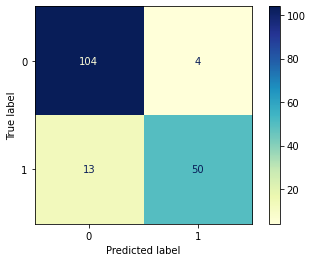

In [9]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [62]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.89      0.96      0.92       108
   Malignant       0.93      0.79      0.85        63

    accuracy                           0.90       171
   macro avg       0.91      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



Text(0.5, 0, 'False Positive Rate')

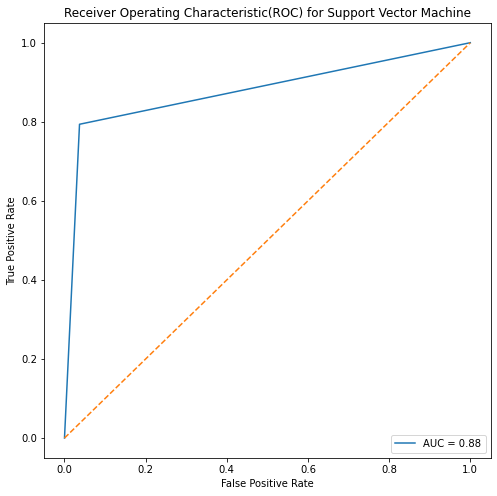

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

### LASSO Tuning

In [11]:
# define models and parameters
# define grid search
param_grid={'solver': ['liblinear'], 
            'penalty':['l1'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=10, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear')


0.9168206349206349

In [12]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
1,0.005400,0.000801,0.004134,0.000846,10,5000,l1,liblinear,"{'C': 10, 'max_iter': 5000, 'penalty': 'l1', '...",0.872000,...,0.909333,0.893333,0.898667,0.920000,0.946667,0.860000,0.958333,0.916821,0.042210,1
2,0.004902,0.001223,0.003899,0.000869,1,5000,l1,liblinear,"{'C': 1.0, 'max_iter': 5000, 'penalty': 'l1', ...",0.869333,...,0.909333,0.893333,0.898667,0.922667,0.946667,0.860000,0.958333,0.916643,0.042213,2
4,0.005766,0.001498,0.005268,0.001062,0.01,5000,l1,liblinear,"{'C': 0.01, 'max_iter': 5000, 'penalty': 'l1',...",0.869333,...,0.896000,0.888000,0.890667,0.906667,0.969333,0.894286,0.947222,0.914742,0.038932,3
3,0.005167,0.001213,0.003967,0.000912,0.1,5000,l1,liblinear,"{'C': 0.1, 'max_iter': 5000, 'penalty': 'l1', ...",0.869333,...,0.922667,0.885333,0.896000,0.930667,0.946667,0.851429,0.955556,0.914368,0.043216,4
5,0.007533,0.001087,0.005835,0.001068,1000,5000,l1,liblinear,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l1',...",0.808000,...,0.922667,0.872000,0.885333,0.917333,0.968000,0.834286,0.961111,0.914232,0.052011,5
0,0.009801,0.014191,0.005375,0.001436,100,5000,l1,liblinear,"{'C': 100, 'max_iter': 5000, 'penalty': 'l1', ...",0.808000,...,0.925333,0.885333,0.888000,0.914667,0.957333,0.820000,0.961111,0.911674,0.052633,6


In [13]:
lr= LogisticRegression(penalty='l1', C=10, solver='liblinear', random_state=random)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Score: ",lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Score:  0.8793969849246231
Test Score:  0.9005847953216374
Training ROC_AUC:  0.853750572760842
Test ROC_AUC:  0.8849206349206349


Accuracy : 90.06
precision : 89.66
recall : 82.54


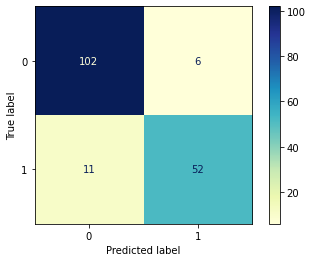

In [14]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [15]:
# last 5 are what was predicted incorrectly
residuals = lr.predict_proba(X_test)[:,1] - y_test
sortIdx=np.argsort(np.abs(residuals))
residDF=X_test.iloc[sortIdx].copy()
residDF["resid"]=residuals[sortIdx]
residDF['y_true']=y_test[sortIdx]
residDF['y_pred']=y_test_pred[sortIdx]
# print(residDF.std())
outliers=residDF.tail(15)
outliers
# outliers.std()
#sns.regplot(x = residuals, y = y_test_pred, scatter = True, color = 'red');

,texture_se,area_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,resid,y_true,y_pred
500,0.8423,34.84,0.004123,0.010040,0.01055,0.003237,0.557244,0,1
15,1.0330,32.55,0.005607,0.010900,0.01857,0.005466,-0.576956,1,0
424,1.7470,43.52,0.013070,0.010520,0.03100,0.004225,0.598856,0,1
54,0.8339,29.91,0.004675,0.009222,0.01095,0.001629,-0.610625,1,0
275,2.2930,48.84,0.014180,0.019100,0.02678,0.003002,0.626009,0,1
177,1.2840,31.59,0.006627,0.018130,0.01682,0.004584,-0.675697,1,0
86,2.2200,38.87,0.009369,0.017610,0.02418,0.003249,-0.688965,1,0
73,0.6205,23.35,0.004717,0.009206,0.01220,0.003130,-0.754254,1,0
89,0.7372,42.76,0.005508,0.016230,0.02427,0.004841,0.811389,0,1
184,0.4956,19.53,0.003290,0.006009,0.01172,0.002575,-0.819316,1,0


In [16]:
residDF.groupby('y_true').mean()

,texture_se,area_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,resid,y_pred
y_true,,,,,,,,
0,1.278795,20.851676,0.007250,0.009473,0.021548,0.003563,0.140789,0.055556
1,1.194225,72.096508,0.006601,0.014960,0.019892,0.004218,-0.198963,0.825397


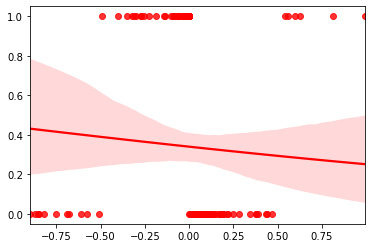

In [17]:
sns.regplot(x = residuals, y = y_test_pred, logistic=True, scatter = True, color = 'red');

## Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
#normal data helped this
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8517587939698492
0.8538011695906432
Training ROC_AUC:  0.8181854936524622
Test ROC_AUC:  0.8346560846560847


#### Bernoulli

In [20]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.6256281407035176
0.631578947368421
Training ROC_AUC:  0.5
Test ROC_AUC:  0.5


### Tuning

In [64]:
param_grid= {'var_smoothing': np.logspace(0,-9, num=100)
        }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(gnb, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GaussianNB(var_smoothing=1.0)


0.9148312169312172

var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.
from https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

In [65]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004610,0.002683,0.004687,0.002436,1,{'var_smoothing': 1.0},0.869333,0.933333,0.986667,0.928000,...,0.896000,0.888000,0.890667,0.906667,0.970667,0.894286,0.947222,0.914831,0.038936,1
1,0.004002,0.000865,0.004034,0.000904,0.811131,{'var_smoothing': 0.8111308307896871},0.869333,0.933333,0.986667,0.928000,...,0.896000,0.888000,0.890667,0.906667,0.970667,0.894286,0.947222,0.914831,0.038936,1
2,0.004091,0.000871,0.003977,0.001022,0.657933,{'var_smoothing': 0.657933224657568},0.869333,0.933333,0.986667,0.928000,...,0.896000,0.888000,0.890667,0.906667,0.970667,0.894286,0.947222,0.914831,0.038936,1
3,0.005118,0.001385,0.005683,0.001415,0.53367,{'var_smoothing': 0.533669923120631},0.869333,0.933333,0.986667,0.928000,...,0.896000,0.888000,0.890667,0.906667,0.970667,0.894286,0.947222,0.914831,0.038936,1
4,0.006441,0.001177,0.006926,0.000913,0.432876,{'var_smoothing': 0.43287612810830584},0.869333,0.933333,0.986667,0.928000,...,0.896000,0.888000,0.890667,0.906667,0.970667,0.894286,0.947222,0.914831,0.038936,1
5,0.007393,0.001318,0.007294,0.000992,0.351119,{'var_smoothing': 0.3511191734215131},0.869333,0.933333,0.986667,0.928000,...,0.896000,0.888000,0.890667,0.906667,0.970667,0.894286,0.947222,0.914742,0.039086,6
6,0.005866,0.001070,0.006150,0.001225,0.284804,{'var_smoothing': 0.2848035868435802},0.866667,0.933333,0.986667,0.928000,...,0.896000,0.888000,0.890667,0.904000,0.970667,0.894286,0.947222,0.913935,0.039264,7
7,0.004387,0.001124,0.004653,0.000923,0.231013,{'var_smoothing': 0.23101297000831597},0.864000,0.933333,0.986667,0.928000,...,0.896000,0.874667,0.890667,0.896000,0.962667,0.891429,0.941667,0.910426,0.040450,8
8,0.004706,0.000810,0.004884,0.000653,0.187382,{'var_smoothing': 0.1873817422860384},0.858667,0.933333,0.986667,0.922667,...,0.888000,0.872000,0.890667,0.898667,0.957333,0.888571,0.933333,0.907689,0.039669,9
94,0.003315,0.000786,0.003630,0.000654,2.84804e-09,{'var_smoothing': 2.848035868435805e-09},0.949333,0.896000,0.978667,0.906667,...,0.882667,0.872000,0.848000,0.904000,0.973333,0.945714,0.894444,0.906126,0.044745,10


##### Tuned Model

In [66]:
gnb = GaussianNB(var_smoothing=1.0)
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.7211055276381909
0.7309941520467836
Training ROC_AUC:  0.62751677852349
Test ROC_AUC:  0.6349206349206349


Text(0.5, 0, 'False Positive Rate')

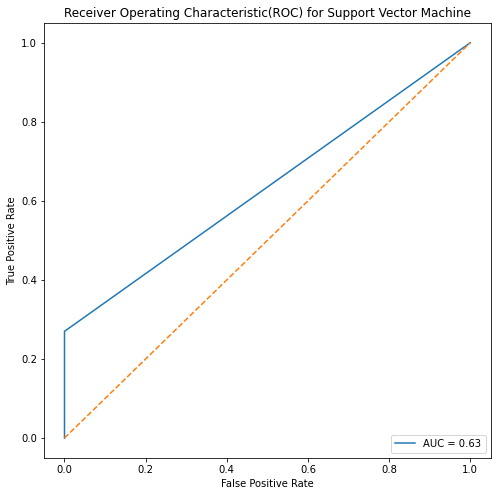

In [25]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
#KNN is more sensititve to noise
transformer = RobustScaler().fit(X)
X_scaled=transformer.transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random)
#scaling didn't help*****************************
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9221105527638191
0.9590643274853801
Training ROC_AUC:  0.9067545349181962
Test ROC_AUC:  0.9477513227513227


### Tuning

In [70]:
param_grid= {'n_neighbors': np.arange(1,40),
            'p':[1,2]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(knn, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

KNeighborsClassifier(n_neighbors=21, p=1)


0.9708566137566137

In [71]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
40,0.004197,0.000721,0.005442,0.000771,21,1,"{'n_neighbors': 21, 'p': 1}",0.978667,0.996000,0.992000,...,0.965333,0.977333,0.980000,0.993333,0.996000,0.868571,0.972222,0.970857,0.030315,1
38,0.004905,0.000976,0.006337,0.001229,20,1,"{'n_neighbors': 20, 'p': 1}",0.978667,0.993333,0.989333,...,0.941333,0.976000,0.985333,0.997333,0.997333,0.868571,0.972222,0.970729,0.030571,2
36,0.003977,0.000702,0.005200,0.000680,19,1,"{'n_neighbors': 19, 'p': 1}",0.978667,0.994667,0.993333,...,0.941333,0.977333,0.986667,0.992000,0.997333,0.874286,0.972222,0.970589,0.030254,3
42,0.004255,0.000949,0.005259,0.001063,22,1,"{'n_neighbors': 22, 'p': 1}",0.978667,0.996000,0.992000,...,0.961333,0.974667,0.977333,0.993333,0.994667,0.868571,0.972222,0.970053,0.030255,4
46,0.004334,0.000820,0.005672,0.000952,24,1,"{'n_neighbors': 24, 'p': 1}",0.974667,0.997333,0.993333,...,0.958667,0.973333,0.976000,0.993333,0.994667,0.862857,0.986111,0.969385,0.031476,5
44,0.004561,0.000748,0.005736,0.000789,23,1,"{'n_neighbors': 23, 'p': 1}",0.974667,0.994667,0.990667,...,0.960000,0.973333,0.977333,0.990667,0.994667,0.868571,0.972222,0.969299,0.030338,6
48,0.003999,0.000691,0.005232,0.000818,25,1,"{'n_neighbors': 25, 'p': 1}",0.969333,0.997333,0.992000,...,0.958667,0.973333,0.973333,0.994667,0.994667,0.862857,0.986111,0.968854,0.031651,7
50,0.004397,0.000798,0.005603,0.001338,26,1,"{'n_neighbors': 26, 'p': 1}",0.968000,0.998667,0.993333,...,0.958667,0.969333,0.972000,0.994667,0.994667,0.861429,0.986111,0.968135,0.032153,8
56,0.004214,0.000788,0.005181,0.000825,29,1,"{'n_neighbors': 29, 'p': 1}",0.970667,1.000000,0.990667,...,0.952000,0.969333,0.970667,0.993333,0.994667,0.858571,0.986111,0.967857,0.032761,9
32,0.004369,0.000912,0.005532,0.001088,17,1,"{'n_neighbors': 17, 'p': 1}",0.981333,0.994667,0.993333,...,0.941333,0.981333,0.985333,0.989333,0.997333,0.880000,0.972222,0.967585,0.032415,10


##### Tuned Model

In [75]:
knn=KNeighborsClassifier(n_neighbors=21, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.914572864321608
0.9590643274853801
Training ROC_AUC:  0.895339748254764
Test ROC_AUC:  0.9477513227513227


In [76]:
knn=KNeighborsClassifier(n_neighbors=17, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.914572864321608
0.9649122807017544
Training ROC_AUC:  0.895339748254764
Test ROC_AUC:  0.9523809523809523


Text(0.5, 0, 'False Positive Rate')

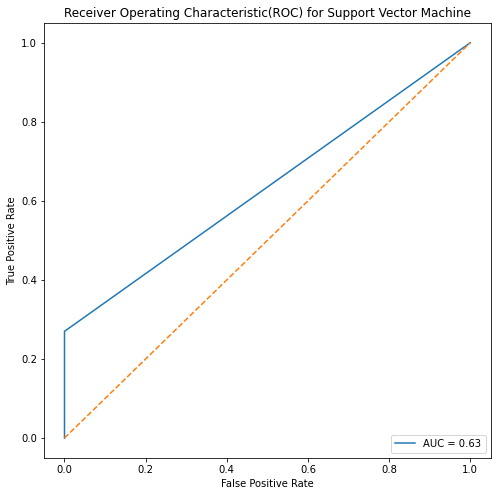

In [31]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## SVM

In [32]:
#SVM
from sklearn.svm import SVC
clf = SVC()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8567839195979899
0.8947368421052632
Training ROC_AUC:  0.8195062127705453
Test ROC_AUC:  0.8736772486772486


In [226]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Tuning

In [33]:
param_grid= {'kernel' : ['poly', 'rbf', 'sigmoid'],
             'C' : [50, 10, 1.0, 0.1, 0.01],
             'gamma' : ['scale']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SVC(C=50, kernel='poly')


0.9160957671957674

In [34]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006600,0.001143,0.005345,0.001163,50,scale,poly,"{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}",0.858667,0.949333,...,0.890667,0.896000,0.896000,0.909333,0.965333,0.891429,0.950000,0.916096,0.039800,1
3,0.011630,0.002427,0.010601,0.002824,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.866667,0.936000,...,0.896000,0.890667,0.893333,0.906667,0.968000,0.894286,0.947222,0.915276,0.038609,2
7,0.006704,0.000931,0.004896,0.001085,1,scale,rbf,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.866667,0.936000,...,0.896000,0.888000,0.893333,0.906667,0.968000,0.894286,0.947222,0.915009,0.038942,3
9,0.006533,0.001175,0.004935,0.000854,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.869333,0.933333,...,0.896000,0.888000,0.890667,0.906667,0.970667,0.894286,0.947222,0.914831,0.038936,4
12,0.006499,0.001176,0.004802,0.000702,0.01,scale,poly,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}",0.869333,0.933333,...,0.896000,0.888000,0.890667,0.906667,0.970667,0.894286,0.947222,0.914831,0.038936,4
6,0.006066,0.001125,0.004802,0.000872,1,scale,poly,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}",0.869333,0.933333,...,0.896000,0.888000,0.890667,0.906667,0.968000,0.894286,0.947222,0.914742,0.038877,6
10,0.009267,0.001290,0.006001,0.000931,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.869333,0.933333,...,0.896000,0.888000,0.890667,0.906667,0.968000,0.894286,0.947222,0.914739,0.038613,7
13,0.010433,0.001821,0.006468,0.001024,0.01,scale,rbf,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.869333,0.933333,...,0.896000,0.888000,0.890667,0.906667,0.968000,0.894286,0.947222,0.914561,0.038827,8
4,0.009701,0.001242,0.006700,0.001187,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.874667,0.938667,...,0.864000,0.888000,0.882667,0.920000,0.938667,0.871429,0.927778,0.902782,0.044231,9
1,0.007614,0.001167,0.004768,0.000920,50,scale,rbf,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}",0.882667,0.952000,...,0.877333,0.890667,0.882667,0.925333,0.938667,0.851429,0.925000,0.901888,0.045078,10


##### Tuned Model

In [35]:
clf = SVC(C=50, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8567839195979899
0.8947368421052632
Training ROC_AUC:  0.8195062127705453
Test ROC_AUC:  0.8736772486772486


In [36]:
clf = SVC(C=10, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8567839195979899
0.8888888888888888
Training ROC_AUC:  0.8195062127705453
Test ROC_AUC:  0.8657407407407407


## Decision trees

In [37]:
# Decision trees
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.8362573099415205
Training ROC_AUC:  1.0
Test ROC_AUC:  0.8273809523809524


### Tuning

In [38]:
maxDepth=clf.tree_.max_depth
param_grid = {'max_depth':range(1, maxDepth+1),
              'max_features':[0.2,0.4,0.6,0.8], 
              'max_leaf_nodes':[20,30,40,50],
             'min_samples_leaf': [1,2,5,10]}
clf = tree.DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'max_depth': 9, 'max_features': 0.8, 'max_leaf_nodes': 20, 'min_samples_leaf': 10}


0.8931039682539681

In [39]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
563,0.004132,0.000618,0.003867,0.000669,9,0.8,20,10,"{'max_depth': 9, 'max_features': 0.8, 'max_lea...",0.872000,...,0.905333,0.838667,0.853333,0.952000,0.994667,0.868571,0.881944,0.893104,0.045463,1
319,0.008767,0.004333,0.008734,0.002080,5,0.8,50,10,"{'max_depth': 5, 'max_features': 0.8, 'max_lea...",0.794667,...,0.840000,0.862667,0.856000,0.970667,0.980000,0.877143,0.901389,0.891275,0.048738,2
178,0.006813,0.001607,0.006702,0.001679,3,0.8,20,5,"{'max_depth': 3, 'max_features': 0.8, 'max_lea...",0.896000,...,0.850667,0.885333,0.820000,0.957333,0.949333,0.907143,0.894444,0.889719,0.052131,3
575,0.004599,0.000952,0.004370,0.001225,9,0.8,50,10,"{'max_depth': 9, 'max_features': 0.8, 'max_lea...",0.837333,...,0.873333,0.836000,0.861333,0.928000,0.929333,0.924286,0.862500,0.889691,0.052715,4
359,0.004333,0.000789,0.004501,0.001057,6,0.6,30,10,"{'max_depth': 6, 'max_features': 0.6, 'max_lea...",0.869333,...,0.829333,0.804000,0.892000,0.965333,0.981333,0.944286,0.940278,0.889473,0.062833,5
755,0.005701,0.001069,0.005574,0.001527,12,0.8,20,10,"{'max_depth': 12, 'max_features': 0.8, 'max_le...",0.850667,...,0.878667,0.890667,0.861333,0.953333,0.981333,0.834286,0.880556,0.889314,0.049838,6
311,0.006801,0.001077,0.006600,0.001405,5,0.8,30,10,"{'max_depth': 5, 'max_features': 0.8, 'max_lea...",0.860000,...,0.826667,0.886667,0.886667,0.942667,0.958667,0.865714,0.915278,0.888495,0.053054,7
247,0.004219,0.000704,0.004339,0.000946,4,0.8,30,10,"{'max_depth': 4, 'max_features': 0.8, 'max_lea...",0.909333,...,0.628000,0.848000,0.804000,0.896000,0.974667,0.884286,0.905556,0.888474,0.067621,8
639,0.003234,0.000498,0.003001,0.000729,10,0.8,50,10,"{'max_depth': 10, 'max_features': 0.8, 'max_le...",0.817333,...,0.788000,0.889333,0.865333,0.977333,0.972000,0.917143,0.884722,0.888360,0.055293,9
763,0.004267,0.000815,0.003900,0.000700,12,0.8,40,10,"{'max_depth': 12, 'max_features': 0.8, 'max_le...",0.848000,...,0.872000,0.845333,0.890667,0.893333,0.970667,0.900000,0.908333,0.887099,0.044968,10


##### Tuned Model

In [40]:
clf=tree.DecisionTreeClassifier(max_depth= 9, max_features= 0.8, max_leaf_nodes= 20, min_samples_leaf= 10)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8969849246231156
0.8830409356725146
Training ROC_AUC:  0.8718498153688581
Test ROC_AUC:  0.861111111111111


## Random Forest

In [77]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9181286549707602
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9087301587301587


### Tuning

In [56]:
param_grid = {'max_depth':np.arange(4, 10),
              'max_features':[0.2,0.4,0.6,0.8],
              'n_estimators': [10,50,100,200,300,500,1000]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf_rf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

RandomForestClassifier(max_depth=8, max_features=0.2, n_estimators=500,
                       random_state=42)


0.939915343915344

In [57]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
117,1.605275,0.348436,0.094586,0.024324,8,0.2,500,"{'max_depth': 8, 'max_features': 0.2, 'n_estim...",0.922667,0.944000,...,0.888000,0.898667,0.896000,0.952000,0.992000,0.977143,0.936111,0.939915,0.036714,1
146,2.792150,0.548878,0.156760,0.053138,9,0.2,1000,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",0.922667,0.944000,...,0.888000,0.901333,0.904000,0.952000,0.992000,0.971429,0.938889,0.939828,0.037092,2
87,0.519503,0.027812,0.031450,0.003556,7,0.2,200,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",0.922667,0.944000,...,0.890667,0.904000,0.888000,0.952000,0.992000,0.982857,0.927778,0.939397,0.037380,3
89,1.562031,0.382946,0.086037,0.022947,7,0.2,500,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",0.925333,0.946667,...,0.888000,0.909333,0.890667,0.952000,0.992000,0.968571,0.933333,0.939277,0.037509,4
118,2.872976,0.589211,0.164278,0.048334,8,0.2,1000,"{'max_depth': 8, 'max_features': 0.2, 'n_estim...",0.922667,0.944000,...,0.890667,0.901333,0.898667,0.949333,0.992000,0.974286,0.938889,0.939261,0.036527,5
143,0.502962,0.027493,0.031196,0.002891,9,0.2,200,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",0.917333,0.944000,...,0.896000,0.898667,0.893333,0.957333,0.992000,0.965714,0.933333,0.939113,0.037114,6
116,0.753638,0.031198,0.044726,0.004798,8,0.2,300,"{'max_depth': 8, 'max_features': 0.2, 'n_estim...",0.920000,0.944000,...,0.888000,0.896000,0.888000,0.952000,0.994667,0.977143,0.936111,0.939029,0.036689,7
90,2.994557,0.796752,0.182631,0.062942,7,0.2,1000,"{'max_depth': 7, 'max_features': 0.2, 'n_estim...",0.928000,0.946667,...,0.890667,0.909333,0.893333,0.949333,0.992000,0.968571,0.933333,0.938996,0.037462,8
145,1.291114,0.156364,0.075482,0.013007,9,0.2,500,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",0.925333,0.946667,...,0.882667,0.901333,0.893333,0.952000,0.992000,0.971429,0.936111,0.938838,0.038211,9
142,0.243790,0.010832,0.019692,0.015452,9,0.2,100,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",0.930667,0.938667,...,0.882667,0.914667,0.893333,0.949333,0.989333,0.968571,0.936111,0.938534,0.038145,10


##### Tuned Model

In [78]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=8, max_features=0.2, n_estimators=500,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9949748743718593
0.9122807017543859
Training ROC_AUC:  0.9932885906040269
Test ROC_AUC:  0.9007936507936508


In [79]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=9, max_features=0.2, n_estimators=1000,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9974874371859297
0.9122807017543859
Training ROC_AUC:  0.9966442953020134
Test ROC_AUC:  0.9007936507936508


## Stochastic Gradient D

In [42]:
#SGD
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=5000, random_state=random)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8668341708542714
0.9005847953216374
Training ROC_AUC:  0.8342767041319641
Test ROC_AUC:  0.8783068783068783


In [44]:
param_grid = {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty' : ['l2', 'l1', 'elasticnet'],
              'random_state':[random]
              }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SGDClassifier(loss='log', max_iter=5000, random_state=42)


0.9187534391534393

In [45]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_penalty,param_random_state,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
3,0.008632,0.001425,0.004912,0.001126,log,l2,42,"{'loss': 'log', 'penalty': 'l2', 'random_state...",0.856000,0.954667,...,0.901333,0.898667,0.896000,0.914667,0.962667,0.882857,0.955556,0.918753,0.038250,1
6,0.005932,0.001031,0.004475,0.000770,modified_huber,l2,42,"{'loss': 'modified_huber', 'penalty': 'l2', 'r...",0.856000,0.960000,...,0.901333,0.898667,0.904000,0.914667,0.962667,0.871429,0.955556,0.918267,0.037778,2
12,0.007301,0.001130,0.005276,0.000726,perceptron,l2,42,"{'loss': 'perceptron', 'penalty': 'l2', 'rando...",0.856000,0.954667,...,0.901333,0.898667,0.896000,0.914667,0.962667,0.871429,0.955556,0.918014,0.037406,3
9,0.006396,0.001253,0.004801,0.000909,squared_hinge,l2,42,"{'loss': 'squared_hinge', 'penalty': 'l2', 'ra...",0.850667,0.952000,...,0.901333,0.898667,0.896000,0.914667,0.962667,0.862857,0.955556,0.917824,0.039190,4
5,0.009266,0.001504,0.004810,0.000645,log,elasticnet,42,"{'loss': 'log', 'penalty': 'elasticnet', 'rand...",0.866667,0.960000,...,0.904000,0.896000,0.896000,0.917333,0.962667,0.868571,0.958333,0.917732,0.038361,5
8,0.007066,0.001064,0.004801,0.000909,modified_huber,elasticnet,42,"{'loss': 'modified_huber', 'penalty': 'elastic...",0.853333,0.962667,...,0.904000,0.896000,0.896000,0.914667,0.957333,0.868571,0.955556,0.917639,0.038614,6
2,0.006966,0.001139,0.004801,0.001013,hinge,elasticnet,42,"{'loss': 'hinge', 'penalty': 'elasticnet', 'ra...",0.853333,0.960000,...,0.904000,0.896000,0.896000,0.914667,0.957333,0.868571,0.955556,0.917297,0.039313,7
14,0.007167,0.001186,0.005179,0.000821,perceptron,elasticnet,42,"{'loss': 'perceptron', 'penalty': 'elasticnet'...",0.850667,0.960000,...,0.904000,0.896000,0.896000,0.914667,0.962667,0.868571,0.958333,0.917297,0.039900,8
11,0.008801,0.002613,0.006000,0.001367,squared_hinge,elasticnet,42,"{'loss': 'squared_hinge', 'penalty': 'elasticn...",0.853333,0.962667,...,0.901333,0.885333,0.893333,0.914667,0.957333,0.862857,0.955556,0.917202,0.040591,9
0,0.006100,0.001164,0.004604,0.000985,hinge,l2,42,"{'loss': 'hinge', 'penalty': 'l2', 'random_sta...",0.856000,0.954667,...,0.901333,0.898667,0.896000,0.914667,0.962667,0.862857,0.955556,0.916846,0.039314,10


##### Tuned Model

In [48]:
clf = SGDClassifier(loss='log', max_iter=5000, penalty='l2', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8668341708542714
0.9005847953216374
Training ROC_AUC:  0.8342767041319641
Test ROC_AUC:  0.8783068783068783


In [49]:
clf = SGDClassifier(loss='modified_huber', max_iter=100, penalty='l2', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8668341708542714
0.9005847953216374
Training ROC_AUC:  0.8437104121182718
Test ROC_AUC:  0.8882275132275133


## Stochastic Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.992462311557789
0.8888888888888888
Training ROC_AUC:  0.9899328859060403
Test ROC_AUC:  0.8756613756613757


### Tuning

In [51]:
param_grid = {'n_estimators' : [10, 100, 1000],
              'learning_rate' : [0.001, 0.01, 0.1],
              'subsample' : [0.5, 0.7, 1.0],
              'max_depth' : [3, 7, 9]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, subsample=0.5)


0.9361984126984128

In [52]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
33,1.424003,0.056632,0.005901,0.001012,0.01,3,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.914667,...,0.869333,0.930667,0.901333,0.936000,0.989333,0.954286,0.936111,0.936198,0.033382,1
34,1.569536,0.060249,0.006036,0.001046,0.01,3,1000,0.7,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.917333,...,0.874667,0.920000,0.912000,0.930667,0.992000,0.954286,0.947222,0.934435,0.033989,2
59,0.182505,0.023842,0.005034,0.001224,0.1,3,100,1,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.898667,...,0.877333,0.901333,0.925333,0.936000,0.984000,0.931429,0.950000,0.934429,0.032886,3
35,1.651940,0.085316,0.005740,0.001206,0.01,3,1000,1,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.904000,...,0.888000,0.896000,0.917333,0.938667,0.986667,0.940000,0.950000,0.934059,0.032985,4
43,4.200255,0.093202,0.008668,0.001351,0.01,7,1000,0.7,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.922667,...,0.880000,0.909333,0.906667,0.933333,0.994667,0.968571,0.938889,0.933560,0.033928,5
52,138.288968,707.811065,0.011831,0.002684,0.01,9,1000,0.7,"{'learning_rate': 0.01, 'max_depth': 9, 'n_est...",0.930667,...,0.861333,0.904000,0.906667,0.930667,0.992000,0.968571,0.933333,0.933524,0.036191,6
58,0.177511,0.028575,0.005101,0.001798,0.1,3,100,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.928000,...,0.866667,0.933333,0.906667,0.920000,0.986667,0.957143,0.938889,0.932863,0.034874,7
42,3.493776,0.107458,0.007902,0.000910,0.01,7,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",0.930667,...,0.877333,0.917333,0.885333,0.936000,0.992000,0.968571,0.936111,0.932649,0.036299,8
57,0.194791,0.052093,0.005661,0.001707,0.1,3,100,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.938667,...,0.869333,0.925333,0.893333,0.930667,0.989333,0.934286,0.936111,0.931524,0.033591,9
48,0.518830,0.038729,0.004407,0.000992,0.01,9,100,0.5,"{'learning_rate': 0.01, 'max_depth': 9, 'n_est...",0.946667,...,0.869333,0.896000,0.904000,0.954667,0.992000,0.948571,0.936111,0.931358,0.039005,10


##### Tuned Model

In [53]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.01, subsample=0.5, max_depth=3)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.992462311557789
0.9005847953216374
Training ROC_AUC:  0.9899328859060403
Test ROC_AUC:  0.8849206349206349


In [54]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=1, max_depth=3)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9899497487437185
0.8830409356725146
Training ROC_AUC:  0.9865771812080537
Test ROC_AUC:  0.871031746031746
